# Regresión lineal con Python y sklearn
_En este notebook presentamos un ejemplo de cómo hacer una regresión lineal utilizando el dataset de Car Price_

In [1]:
#!pip install pandas seaborn matplotlib scikit-learn statsmodels yellowbrick numpy
# ó
#!pip install pandas 
#!pip install seaborn 
#!pip install matplotlib
#!pip install scikit-learn
#!pip install statsmodel
#!pip install yellowbrick
#!pip install numpy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_log_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
import numpy as np

In [3]:
# cargar el dataset 
car_df = pd.read_csv('CarPrice.csv')


### Análisis Exploratorio de Datos (EDA) 

Habría que hacer un análisis exploratorio de los datos en base a la tarea que tenemos que resolver.

Nos centraremos en explicar lo que es un EDA y cómo llevarlo a cabo.

Estamos viendo una regresión lineal simple, es decir vamos a realizar la predicción haciendo uso exclusivo de una variable independendiente.

In [4]:
#El componente más importante de Pandas. Es una estructura bidimensional, similar a una tabla de base de datos o una hoja de cálculo de Excel. 
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_df.shape

(205, 26)

In [6]:
# tipo de datos de cada una de las columnas
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# tipo de datos de cada una de las columnas
car_df_numeric = car_df.select_dtypes(include=['float64', 'int64'])
car_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [8]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Verificar si existen valores nulos
null_count = car_df.isnull().sum()
null_count

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Estadísticos de symboling:
count    205.00
mean       0.83
std        1.25
min       -2.00
25%        0.00
50%        1.00
75%        2.00
max        3.00
Name: symboling, dtype: float64


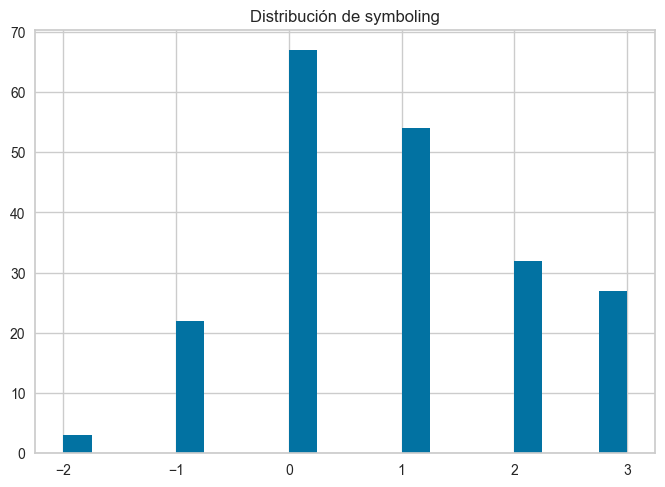

In [10]:
# Analizar estadísticos de las variables symboling, price, curbweight
var1 = 'symboling'
print("Estadísticos de "+var1+":")
print(car_df[var1].describe().round(2))

# Crear histogramas de las variables symboling, price, curbweight
plt.hist(car_df[var1], bins=20)
plt.title("Distribución de "+var1)
plt.show()

Estadísticos de price:
count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64


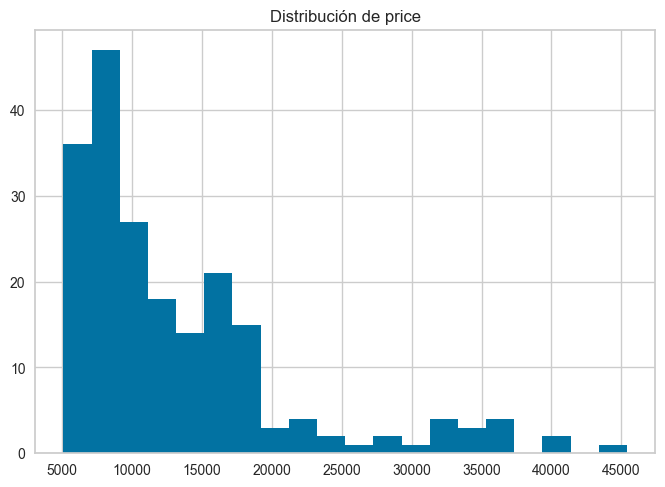

In [11]:
# Analizar estadísticos de las variables symboling, price, curbweight

var1 = 'price'
print("Estadísticos de "+var1+":")
print(car_df[var1].describe().round(2))

# Crear histogramas de las variables symboling, price, curbweight
plt.hist(car_df[var1], bins=20)
plt.title("Distribución de "+var1)
plt.show()

Estadísticos de curbweight:
count     205.00
mean     2555.57
std       520.68
min      1488.00
25%      2145.00
50%      2414.00
75%      2935.00
max      4066.00
Name: curbweight, dtype: float64


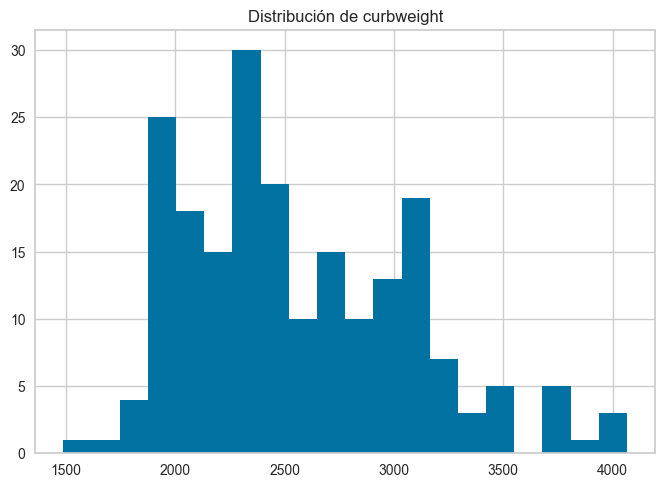

In [12]:
# Analizar estadísticos de las variables symboling, price, curbweight
var1 = 'curbweight'
print("Estadísticos de "+var1+":")
print(car_df[var1].describe().round(2))

# Crear histogramas de las variables symboling, price, curbweight
plt.hist(car_df[var1], bins=20)
plt.title("Distribución de "+var1)
plt.show()

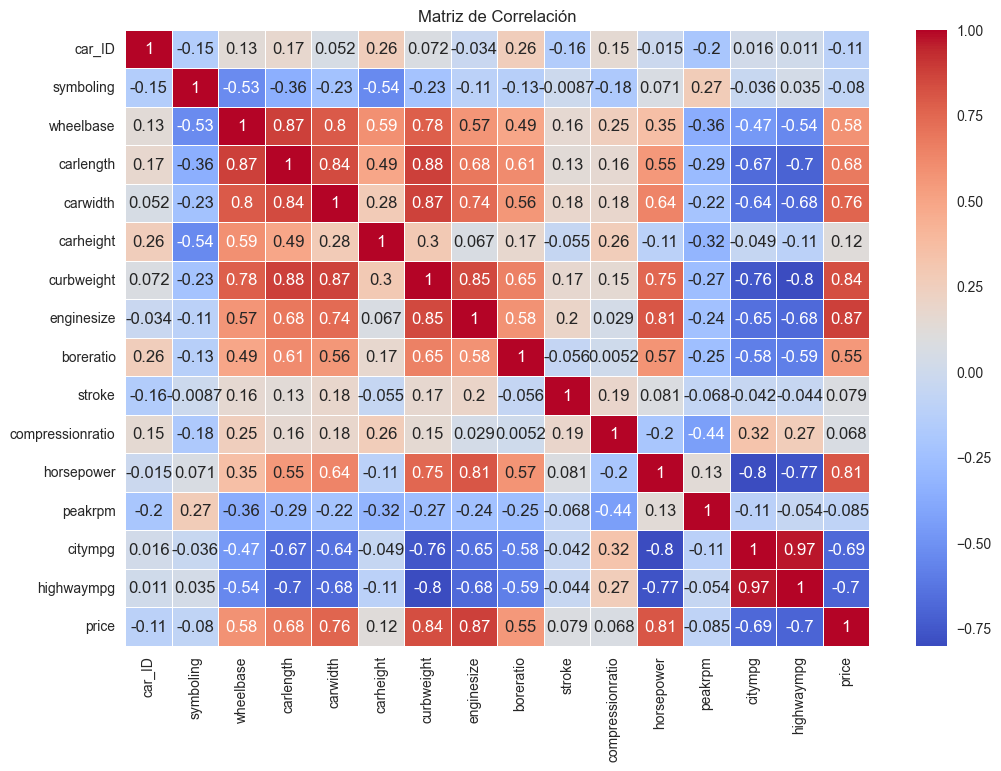

In [13]:
# Calcular la matriz de correlación
correlation_matrix = car_df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [14]:
# Calcular la matriz de correlación
correlation_matrix = car_df_numeric.corr()

# Convertir la matriz a un formato largo (pares de variables y correlaciones)
correlation_pairs = correlation_matrix.unstack()

# Ordenar por valor de correlación (en orden descendente)
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)

# Mostrar las correlaciones más altas (exceptuando 1, que es la correlación de cada variable consigo misma)
print(sorted_pairs[sorted_pairs != 1].head(20))  # 10 pares más correlacionados


citympg     highwaympg    0.971337
highwaympg  citympg       0.971337
carlength   curbweight    0.877728
curbweight  carlength     0.877728
carlength   wheelbase     0.874587
wheelbase   carlength     0.874587
enginesize  price         0.874145
price       enginesize    0.874145
curbweight  carwidth      0.867032
carwidth    curbweight    0.867032
curbweight  enginesize    0.850594
enginesize  curbweight    0.850594
carlength   carwidth      0.841118
carwidth    carlength     0.841118
price       curbweight    0.835305
curbweight  price         0.835305
enginesize  horsepower    0.809769
horsepower  enginesize    0.809769
            price         0.808139
price       horsepower    0.808139
dtype: float64


In [15]:
car_df['enginesize']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [16]:
df = car_df.filter(['enginesize','price'], axis=1)
df.head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [17]:
# train_test_split es una función de scikit-learn que divide un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para prueba (testing).
# random_state indica que se obtendrá la misma división de los datos. Esto es útil para garantizar que los resultados sean consistentes en diferentes ejecuciones del código.
# X_train: Subconjunto de las variables independientes utilizado para entrenar el modelo.
# X_test: Subconjunto de las variables independientes utilizado para probar el modelo.
# y_train: Subconjunto de las variables dependientes correspondientes a X_train para entrenar el modelo.
# y_test: Subconjunto de las variables dependientes correspondientes a X_test para probar el modelo.


# Separamos los datos en conjunto de entrenamiento y conjunto de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(df['enginesize'],df['price'],test_size=30,random_state=0)

X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

# Creamos un objeto de Regresion lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)

# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
car_y_pred = regr.predict(X_test)

In [18]:
car_y_pred

array([ 7275.31894042, 19172.696674  , 14923.63319772,  2176.44276889,
       10334.64464334, 16623.25858823,  7445.28147947,  7445.28147947,
       22571.94745502,  7445.28147947, 19682.58429115, 26311.12331415,
        3706.10562035, 14583.70811962,  7105.35640137, 16623.25858823,
       14243.78304152, 14923.63319772, 10504.60718239,  7445.28147947,
       10504.60718239, 12204.2325729 , 14243.78304152, 16623.25858823,
       20872.32206451,  8295.09417473,  8465.05671378, 12204.2325729 ,
        8465.05671378,  8295.09417473])

In [19]:
#Se utiliza y test para la evaluación
y_test 

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
111    15580.0
131     9895.0
171    11549.0
179    15998.0
138     5118.0
156     6938.0
113    16695.0
161     8358.0
89      5499.0
Name: price, dtype: float64

In [20]:
r2 = r2_score(y_test, car_y_pred)
mse = root_mean_squared_error(y_test, car_y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, car_y_pred))
mae = mean_absolute_error(y_test, car_y_pred)
rmsle = np.sqrt(root_mean_squared_log_error(y_test, car_y_pred))

print(f"R2: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")

R2: 0.61
Mean Squared Error (MSE): 3627.20
Mean Absolute Error (MAE): 3013.88
Root Mean Squared Error (RMSE): 60.23
Root Mean Squared Logarithmic Error (RMSLE): 0.60


In [21]:
#Utilización de Cross Validation
from sklearn.model_selection import train_test_split, cross_val_predict
# Definimos X e y
X = df[['enginesize']]
y = df['price']

# Creamos un objeto de Regresión Lineal para cross-validation
regr_cv = linear_model.LinearRegression()

# Aplicamos cross-validation
car_y_pred_cv = cross_val_predict(regr_cv, X, y, cv=5)

# Calculamos las métricas
r2 = r2_score(y, car_y_pred_cv)
mse = root_mean_squared_error(y, car_y_pred_cv)
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, car_y_pred_cv)
rmsle = np.sqrt(root_mean_squared_log_error(y, car_y_pred_cv))

# Mostramos los resultados
print(f"R2: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")

R2: 0.74
Mean Squared Error (MSE): 4093.39
Mean Absolute Error (MAE): 2933.87
Root Mean Squared Error (RMSE): 63.98
Root Mean Squared Logarithmic Error (RMSLE): 0.56


In [22]:
# Añadimos una constante para el término de intercepción
X_train_const = sm.add_constant(X_train)

# Ajustamos el modelo de regresión lineal usando statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Imprimimos el resumen del modelo, que incluye los p-valores
print(model.summary())

'''Omnibus y Prob(Omnibus): Idealmente, valores p altos (ej. > 0.05) indican que los residuos son normales.
Durbin-Watson: Valores cercanos a 2 indican que no hay autocorrelación.
Jarque-Bera y Prob(JB): Un valor p alto (> 0.05) sugiere que los residuos son normales.
Skew (Asimetría): Valores cercanos a 0 indican una distribución simétrica.
Kurtosis: Valores cercanos a 3 indican una distribución normal en cuanto a "apuntalidad"'''

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     595.7
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           6.48e-58
Time:                        22:10:19   Log-Likelihood:                -1695.9
No. Observations:                 175   AIC:                             3396.
Df Residuals:                     173   BIC:                             3402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8191.2721    939.310     -8.721      0.0

'Omnibus y Prob(Omnibus): Idealmente, valores p altos (ej. > 0.05) indican que los residuos son normales.\nDurbin-Watson: Valores cercanos a 2 indican que no hay autocorrelación.\nJarque-Bera y Prob(JB): Un valor p alto (> 0.05) sugiere que los residuos son normales.\nSkew (Asimetría): Valores cercanos a 0 indican una distribución simétrica.\nKurtosis: Valores cercanos a 3 indican una distribución normal en cuanto a "apuntalidad"'

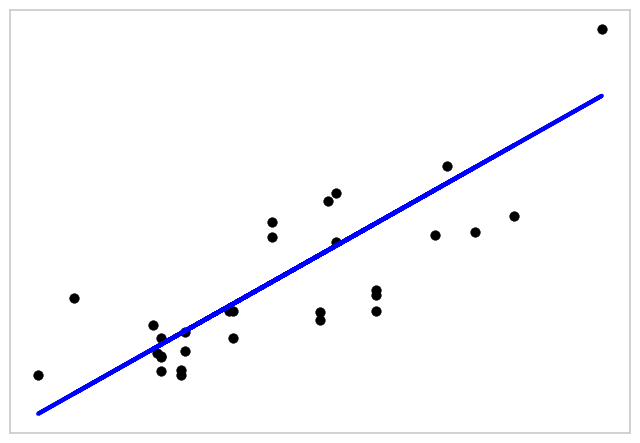

In [23]:
# Plot
# Reentrenar el modelo (fue sobrescrito en la celda de cross-validation)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
car_y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, car_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

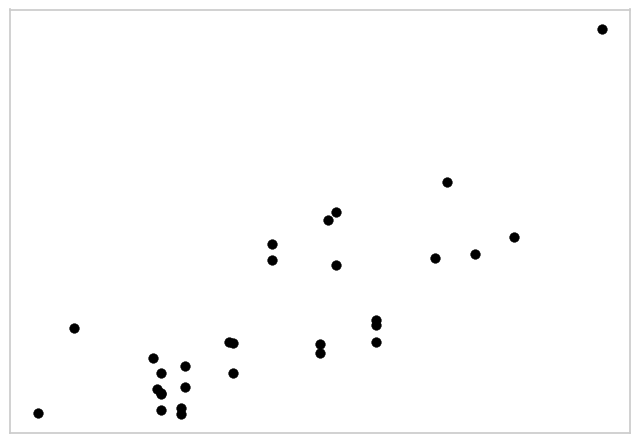

In [24]:
plt.scatter(car_y_pred, y_test, color="black")
plt.xticks(())
plt.yticks(())

plt.show()

## Ejercicio para practicar

**¿Hemos seguido las suposiciones de Regresión lineal?**

1. Features y target relación lineal.
   * Comprobar con un plot que la variable elegida se relaciona de manera lineal con la variable objetivo.
2. Variables independientes no correlacionadas.
   * Mapa de calor o distribución de correlaciones entre variables independientes.
3. Distribución normal de los residuos.
    * Comprobar con un plot que la diferencia entre los valores de test de la variable y los valores de predicción siguen(se asemejan) una distribución normal.
4. Homocedasticidad.
    * Hacer un plot de residuos vs predicción.
5. Autocorrelación
    * Durbin Watson test

**¿Mejoran los resultados con una regresión lineal múltiple?**



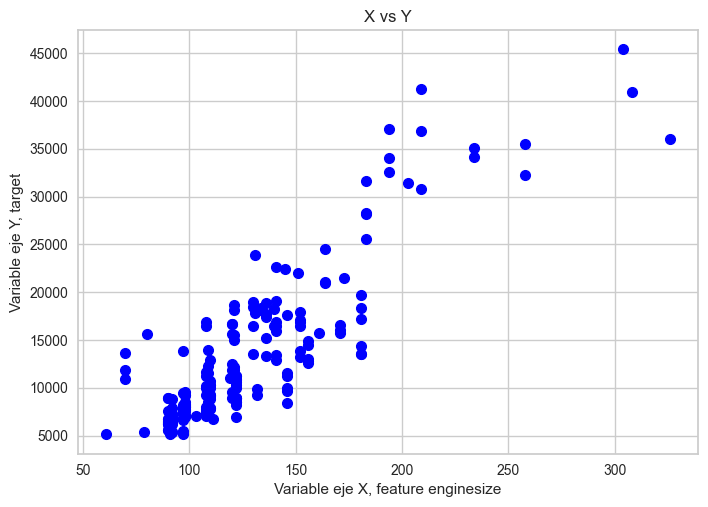

In [25]:
#1. Features y target relación lineal: 
#   Comprobar con un plot que la variable elegida se relaciona de manera lineal con la variable objetivo.

plt.title("X vs Y")
plt.xlabel("Variable eje X, feature enginesize")
plt.ylabel("Variable eje Y, target")
plt.scatter(car_df['enginesize'], car_df['price'], color="blue", linewidth=1)
plt.show()

In [26]:
#car_df_numeric = car_df.select_dtypes(include=[np.number])
car_df_numeric.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


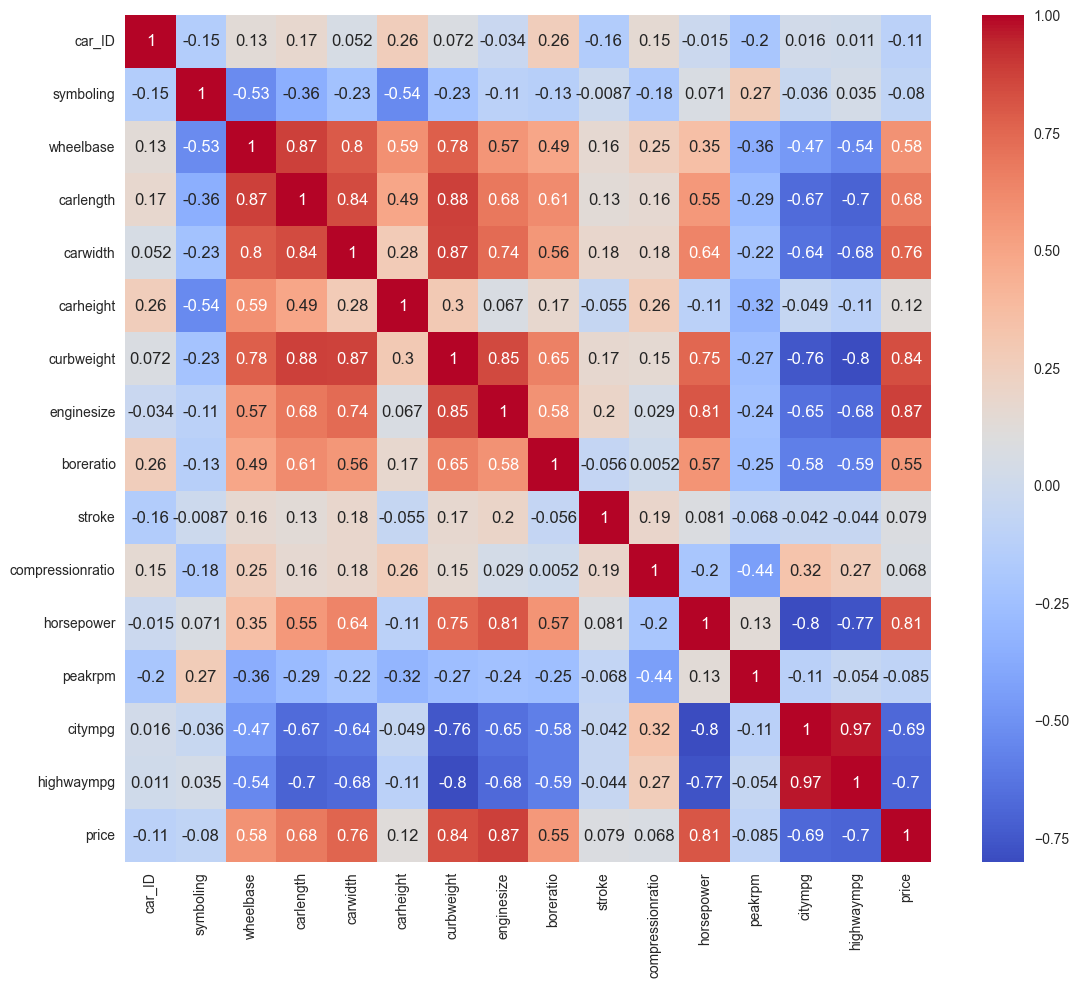

In [27]:
#2. Variables independientes no correlacionadas.
#   * Mapa de calor o distribución de correlaciones entre variables independientes.

# Calculamos la matriz de correlación
corr_matrix = car_df_numeric.corr()

# Creamos una figura con un tamaño personalizado
plt.figure(figsize=(13,11))

# Representamos la matriz de correlación como una tabla de colores
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Mostramos la figura
plt.show()

Text(0, 0.5, 'frequency')

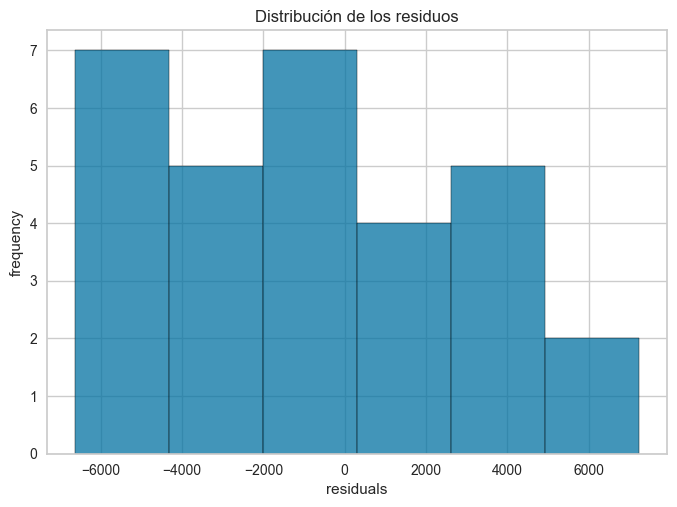

In [28]:
# 3. Distribución normal de los residuos.
#   * Comprobar con un plot que la diferencia entre los valores de test de la variable y los valores de predicción siguen(se asemejan) una distribución normal.

residual = y_test - car_y_pred
sns.histplot(residual)
plt.title("Distribución de los residuos")
plt.xlabel("residuals")
plt.ylabel("frequency")

Text(0, 0.5, 'residuos')

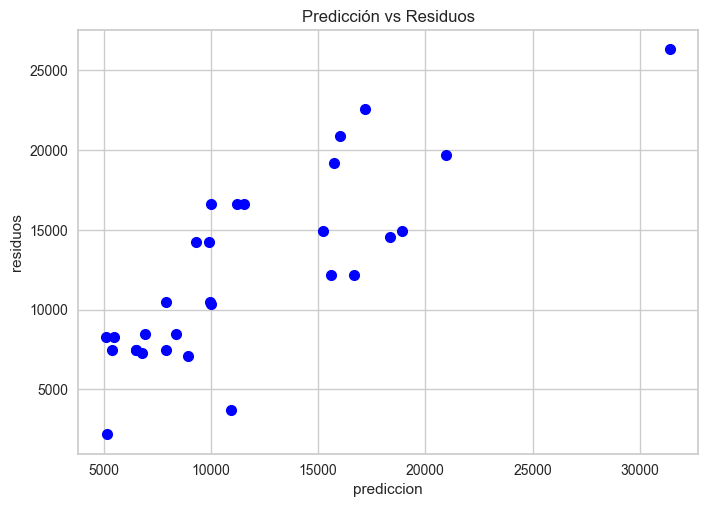

In [29]:
# 4. Homocedasticidad.
#    * Hacer un plot de residuos vs predicción.

plt.scatter(y_test, car_y_pred, color="blue", linewidth=1)
plt.title("Predicción vs Residuos")
plt.xlabel("prediccion")
plt.ylabel("residuos")

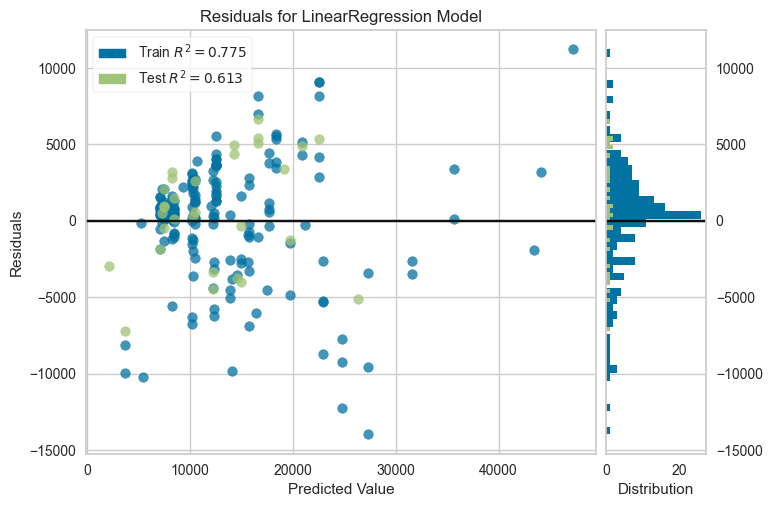

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
# otra manera
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
# 5. Autocorrelación: Indica la dependencia entre observaciones de una serie de tiempo a diferentes intervalos de tiempo. Indica que los errores no son independientes
#    * Durbin Watson test
# pista a partir de lo ya calculado, sacar los residuos (y_test - y_pred)
durbinWatson = durbin_watson(residual)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5: #Indica signos de autocorrelación positiva. Esto significa que los residuos tienden a ser positivos o negativos en grupos consecutivos.
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5: #Indica signos de autocorrelación negativa. Esto significa que los residuos tienden a alternar entre positivos y negativos.
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else: #Indica poca o ninguna autocorrelación.
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Durbin-Watson: 1.3284987567552824
Signs of positive autocorrelation 

Assumption not satisfied


**Regresión lineal múltiple**

In [32]:
# seleccionar solo las variables numéricas

In [33]:
#Borrar precio del dataframe
car_df_x = car_df.drop(columns=['price'])

In [34]:
car_df_x = car_df_x.select_dtypes(include=['float64', 'int64'])


In [35]:
#colocar el precio en la variable despendiente
car_df_y = car_df['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(car_df_x, car_df_y, test_size=0.20, random_state=42)

In [37]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [38]:
regr = linear_model.LinearRegression()
# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
diabetes_y_pred = regr.predict(X_test)

In [39]:
r2 = r2_score(y_test, diabetes_y_pred)
mse = root_mean_squared_error(y_test, diabetes_y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, diabetes_y_pred))
mae = mean_absolute_error(y_test, diabetes_y_pred)
#rmsle = np.sqrt(root_mean_squared_log_error(y_test, diabetes_y_pred))

print(f"R2: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")


R2: 0.85
Mean Squared Error (MSE): 3422.00
Mean Absolute Error (MAE): 2411.09
Root Mean Squared Error (RMSE): 58.50


In [40]:
#R2: 0.67
#Mean Squared Error (MSE): 3692.74
#Mean Absolute Error (MAE): 2996.84
#Root Mean Squared Error (RMSE): 60.77


#Conclusión:
#R²: El Modelo 2 tiene un valor de R² más alto (0.85 vs. 0.67), lo que significa que explica una mayor proporción de la variabilidad en los datos.
#MSE, MAE, RMSE: En todos estos errores, el Modelo 2 presenta valores más bajos, lo que indica que sus predicciones están más cerca de los valores reales.